<a href="https://colab.research.google.com/github/aartikushal/DATA-VISUALIZATION-ASSIGNMENT/blob/main/DATA_VISUALIZATION_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***1. Foundational Knowledge:***
- Understand the principles of data visualization and its importance in exploratory data
analysis.
- Familiarize yourself with the Matplotlib and Seaborn libraries for creating various types of
plots.
- Recognize the advantages of visualizing data for understanding patterns, trends, and
relationships.

**Understand the Core Concepts:** Grasp the fundamental principles of data visualization and its critical role in exploratory data analysis (EDA). Learn how visual representations help uncover insights that may be hidden in raw data.

**Familiarity with Visualization Libraries:** Gain hands-on experience with Python libraries such as Matplotlib and Seaborn. Understand their syntax, capabilities, and best-use scenarios for creating a variety of plots including line plots, bar charts, histograms, box plots, and heatmaps.

**Value of Visualization:** Recognize the benefits of visualizing data—such as identifying trends, patterns, distributions, and relationships among variables—which can significantly improve decision-making and model development.



# ***2. Exploratory Data Analysis (EDA):***
- Analyze the datasets' structures and characteristics using visualizations such as histograms,
scatter plots, and correlation matrices.
- Gain insights into the distribution of variables, relationships between features, and potential
patterns within the data.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv("diabetes.csv")

# View dataset structure
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8     

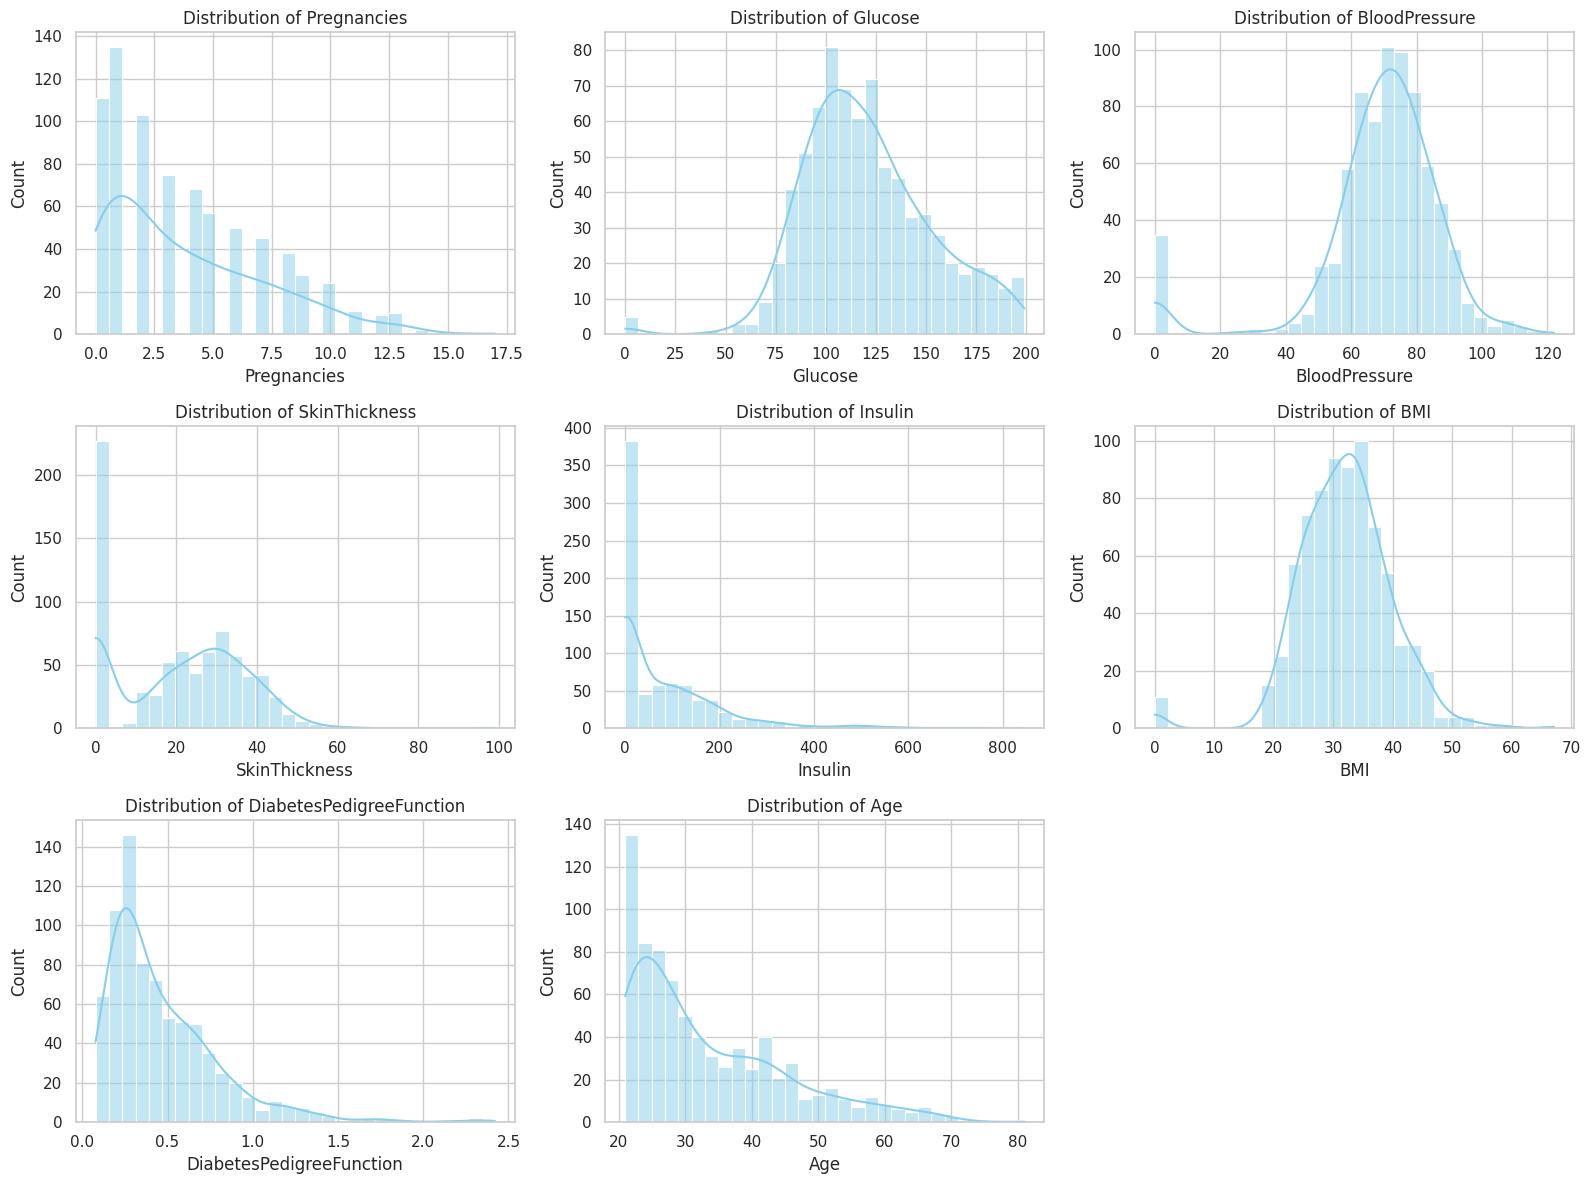

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 12))
sns.set(style="whitegrid")

for idx, column in enumerate(df.columns[:-1]):  # Exclude Outcome
    plt.subplot(3, 3, idx + 1)
    sns.histplot(df[column], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


📌 **Inference:**

Glucose, BMI, and Age appear to follow fairly normal distributions.

Insulin and SkinThickness have spikes at 0, indicating imputed/missing values.

Pregnancies is right-skewed, meaning most individuals have few pregnancies, with some having many (up to 17).

BMI shows a concentration between 30–40, suggesting many individuals are overweight.



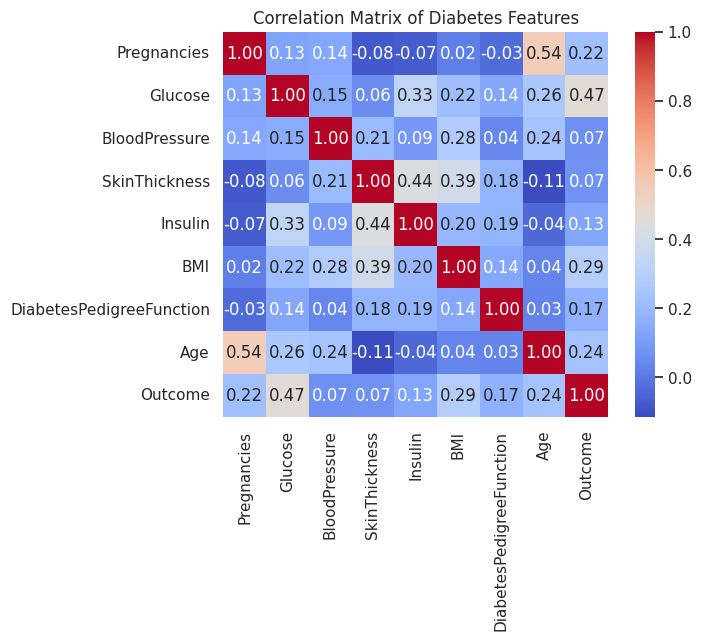

In [8]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(7, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix of Diabetes Features")
plt.show()


📌 **Inference:**

Glucose (0.47) is the most positively correlated feature with the Outcome (logical, since diabetes diagnosis often depends on blood sugar levels).

BMI, Age, and Pregnancies also show modest positive correlations with diabetes risk.

Insulin, BloodPressure, and SkinThickness show weaker correlations.

No multicollinearity is detected—features are mostly independent.

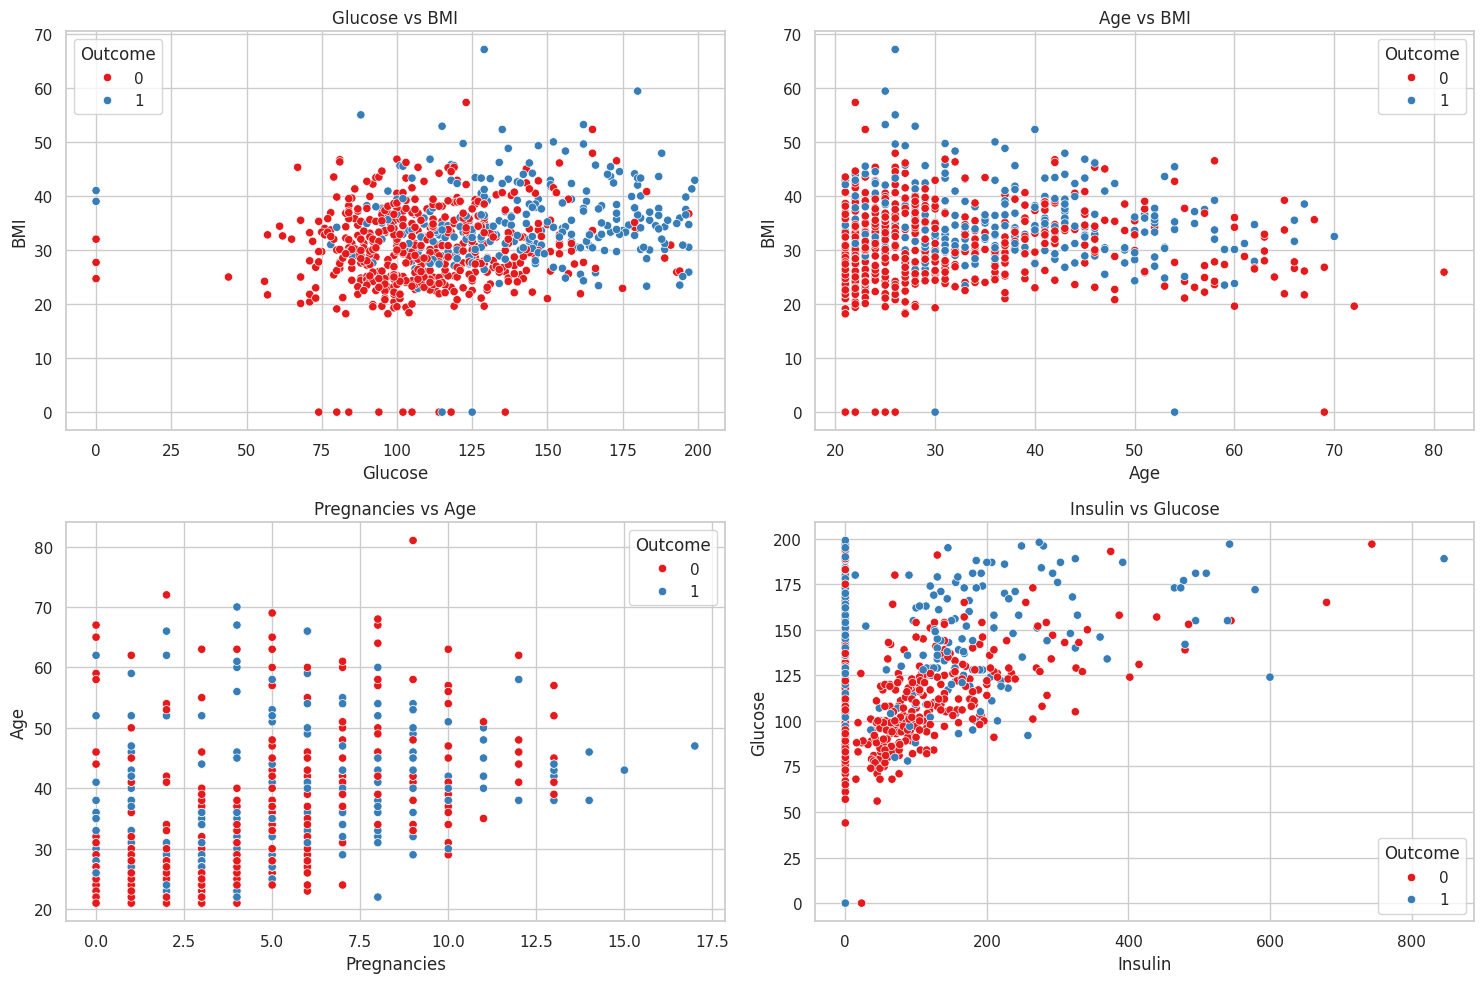

In [9]:
plt.figure(figsize=(15, 10))

# Glucose vs BMI
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='Glucose', y='BMI', hue='Outcome', palette='Set1')
plt.title('Glucose vs BMI')

# Age vs BMI
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='Age', y='BMI', hue='Outcome', palette='Set1')
plt.title('Age vs BMI')

# Pregnancies vs Age
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='Pregnancies', y='Age', hue='Outcome', palette='Set1')
plt.title('Pregnancies vs Age')

# Insulin vs Glucose
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='Insulin', y='Glucose', hue='Outcome', palette='Set1')
plt.title('Insulin vs Glucose')

plt.tight_layout()
plt.show()


📌 **Inference:**

Glucose vs BMI: Clear separation—individuals with high glucose and high BMI are more likely to have diabetes (Outcome=1).

Age vs BMI: Diabetic cases (red) tend to cluster in older age groups with higher BMI.

Pregnancies vs Age: Higher number of pregnancies tends to occur in older individuals, but diabetes cases are spread across.

Insulin vs Glucose: Even though many insulin values are zero, higher glucose often correlates with higher insulin—again hinting at diabetic risk.

/tmp/ipython-input-10-3268149144.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Outcome', palette='pastel')


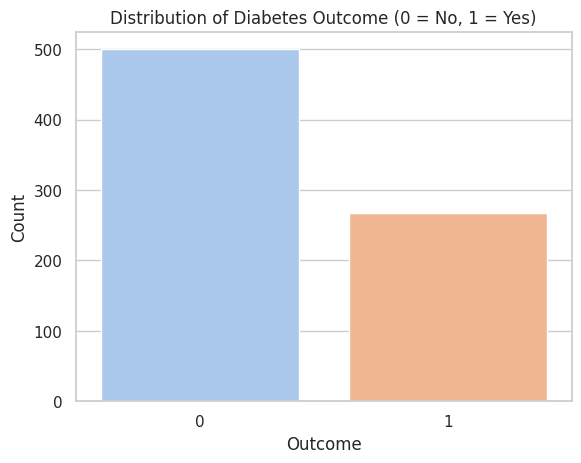

In [10]:
sns.countplot(data=df, x='Outcome', palette='pastel')
plt.title("Distribution of Diabetes Outcome (0 = No, 1 = Yes)")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()


📌 **Inference:**

The dataset has some imbalance: around 65% non-diabetic (Outcome = 0) vs 35% diabetic (Outcome = 1).

This imbalance should be addressed during modeling (e.g., with stratified sampling, SMOTE, or class weighting) to avoid model bias.

Glucose, BMI, Age are strong candidates for prediction based on their distribution and correlation with the target.

Some features may need data cleaning or imputation (e.g., replacing 0s in Insulin, SkinThickness, etc.).

Class imbalance exists and must be handled during modeling.

No multicollinearity issues, so most features can be retained after standardization or transformation.

# ***3. Visualization Techniques:***

- Utilize Matplotlib and Seaborn to create different types of plots, including bar plots, scatter
plots, box plots, violin plots, and pair plots.
- Select appropriate visualization techniques based on the nature of the data and the insights
you aim to extract.

/tmp/ipython-input-11-2801525513.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Outcome', palette='Set2')


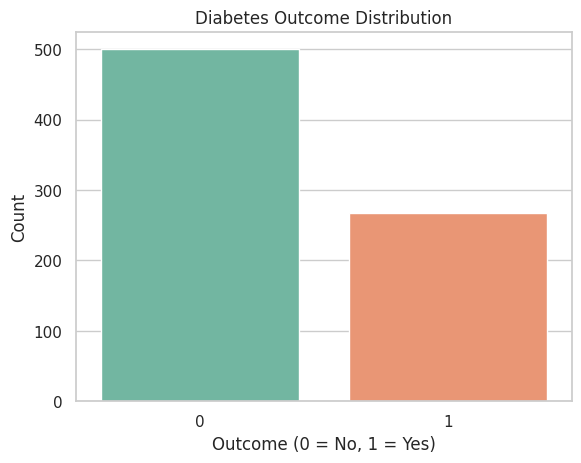

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Outcome', palette='Set2')
plt.title('Diabetes Outcome Distribution')
plt.xlabel('Outcome (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


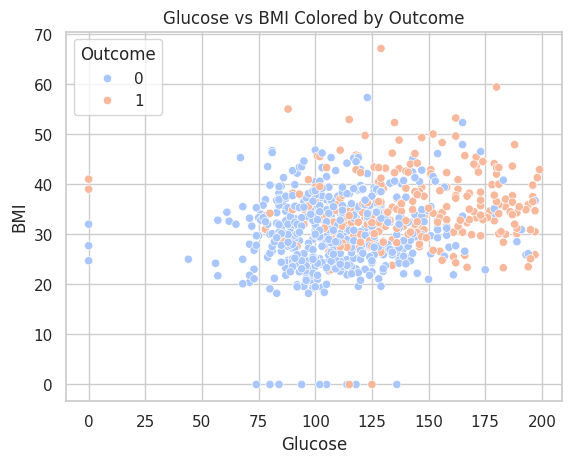

In [12]:
sns.scatterplot(data=df, x='Glucose', y='BMI', hue='Outcome', palette='coolwarm')
plt.title('Glucose vs BMI Colored by Outcome')
plt.show()


/tmp/ipython-input-13-3746451397.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Outcome', y='Age', palette='pastel')


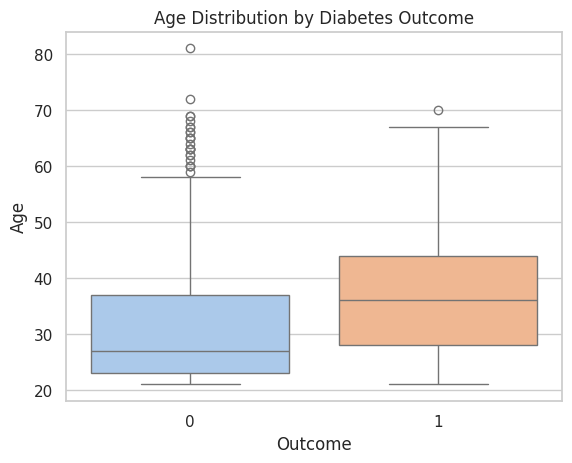

In [13]:
sns.boxplot(data=df, x='Outcome', y='Age', palette='pastel')
plt.title('Age Distribution by Diabetes Outcome')
plt.show()


/tmp/ipython-input-15-2238587387.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Outcome', y='BMI', palette='Set3')


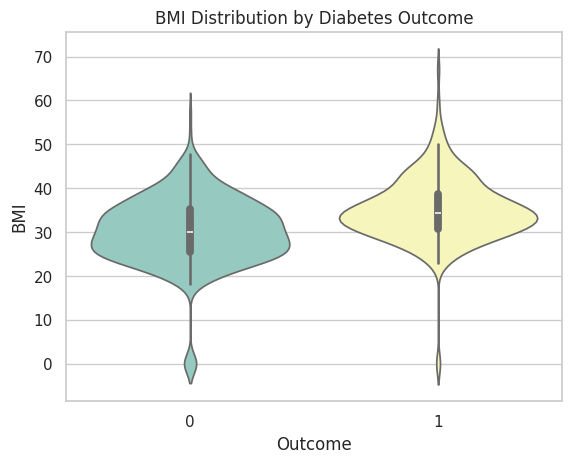

In [15]:
sns.violinplot(data=df, x='Outcome', y='BMI', palette='Set3')
plt.title('BMI Distribution by Diabetes Outcome')
plt.show()


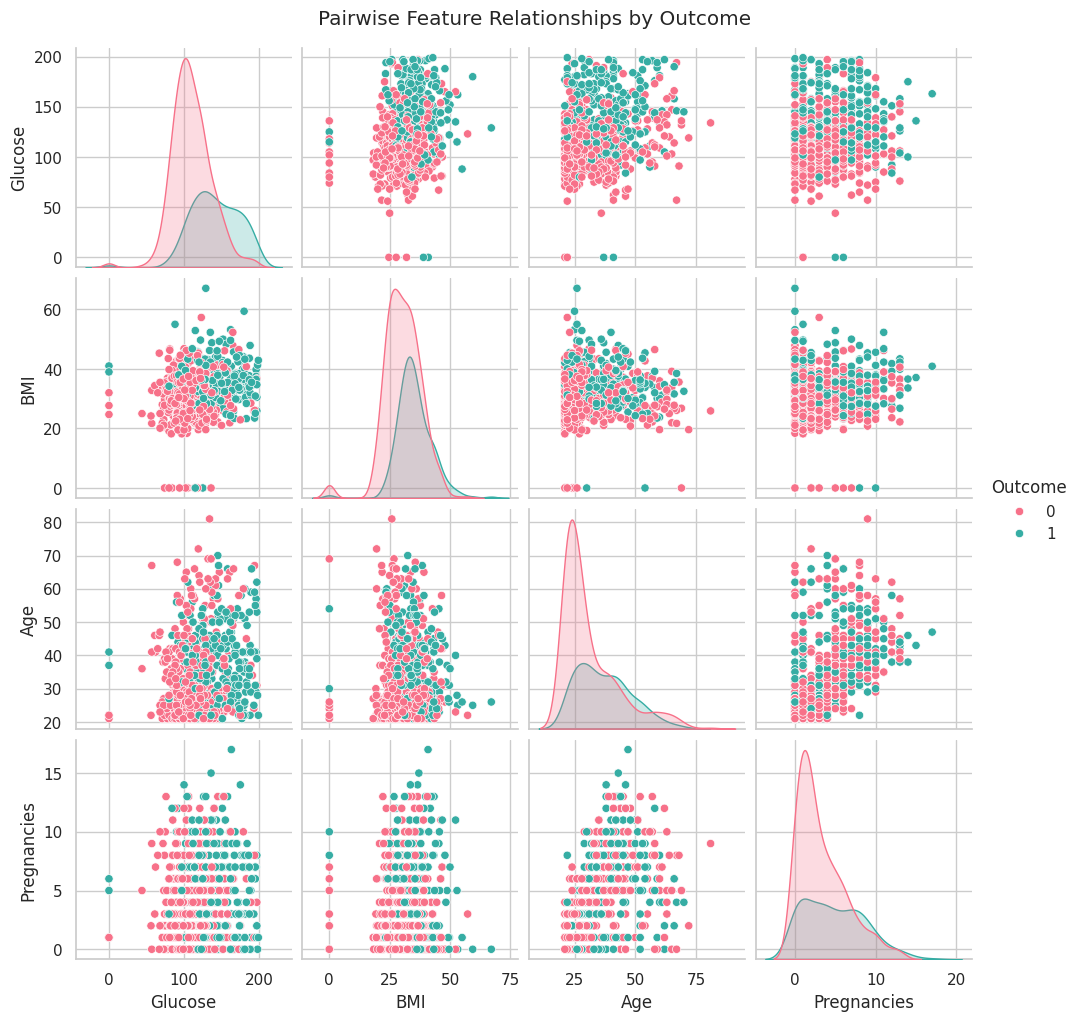

In [16]:
sns.pairplot(df[['Glucose', 'BMI', 'Age', 'Pregnancies', 'Outcome']], hue='Outcome', palette='husl')
plt.suptitle('Pairwise Feature Relationships by Outcome', y=1.02)
plt.show()


# ***4. Data Interpretation:***

- Interpret the visualizations to identify key features, trends, and patterns within the datasets.
- Formulate hypotheses or observations based on the visualized data and propose potential
explanations or further analysis steps.

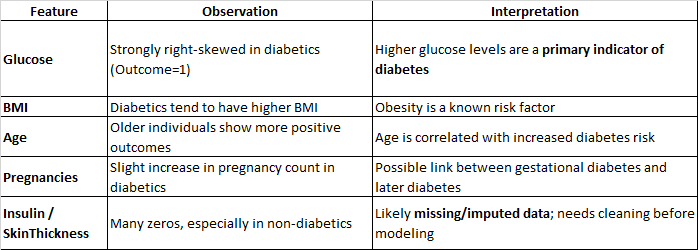

# ***Diabetes Dataset Questions:***
- Address the following questions related to the Diabetes dataset using appropriate
visualizations and interpretations:
6. What is the distribution of age and BMI (Body Mass Index) among diabetic patients?

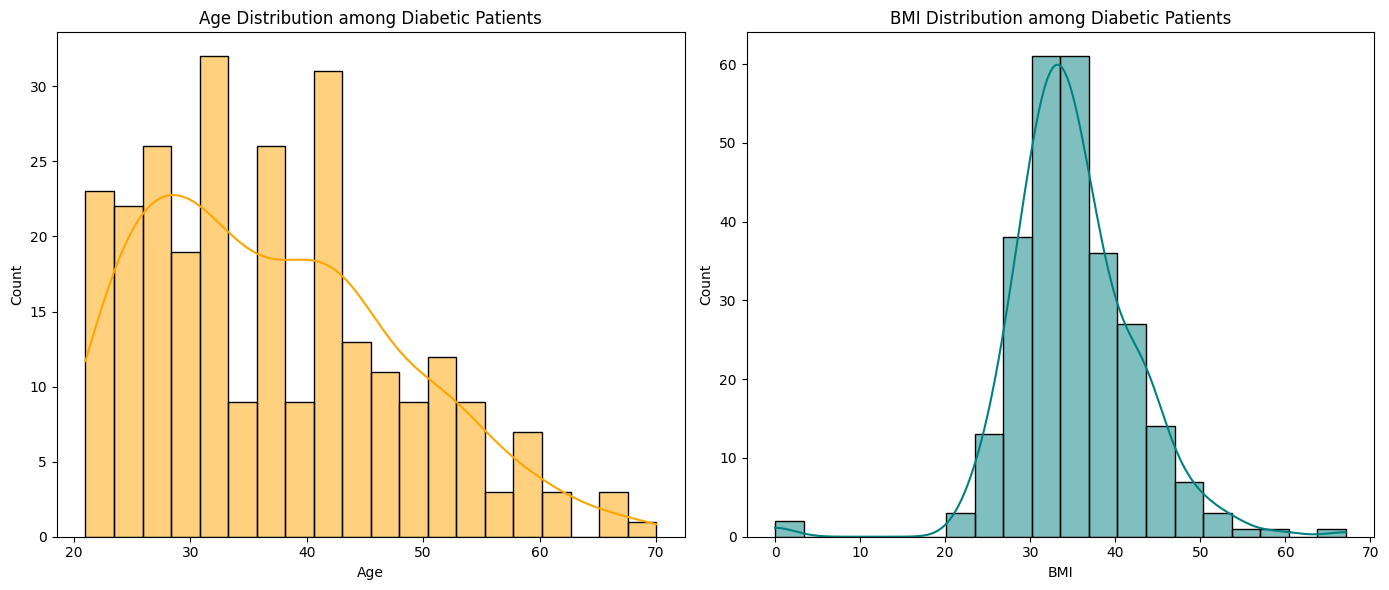

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('diabetes.csv')

# Filter diabetic patients
diabetic_df = df[df['Outcome'] == 1]

# Plotting
plt.figure(figsize=(14, 6))

# Age distribution
plt.subplot(1, 2, 1)
sns.histplot(diabetic_df['Age'], bins=20, kde=True, color='orange')
plt.title('Age Distribution among Diabetic Patients')
plt.xlabel('Age')
plt.ylabel('Count')

# BMI distribution
plt.subplot(1, 2, 2)
sns.histplot(diabetic_df['BMI'], bins=20, kde=True, color='teal')
plt.title('BMI Distribution among Diabetic Patients')
plt.xlabel('BMI')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


📈 1. Age Distribution (Diabetic Patients)

✅ Observation:
The majority of diabetic patients fall in the 20 to 60 age range.

There's a noticeable peak around age 30.

Fewer diabetic patients are above 40.

📌 Inference:
Middle-aged adults are at higher risk of diabetes in this dataset.

Risk increases steadily from age 30 onward.

Supports medical findings that Type 2 diabetes is more prevalent in older populations due to lifestyle and metabolic changes.

📊 2. BMI Distribution (Diabetic Patients)

✅ Observation:
BMI values are mostly between 20 and 50, with a peak around 32–35.

Very few diabetic patients have BMI below 25 (i.e., normal range).

A significant number are above the obesity threshold (BMI ≥ 30).

📌 Inference:
Overweight and obesity are major contributing factors to diabetes in this dataset.

Strong correlation between high BMI and diabetes, suggesting excess body fat is a key predictor.

Indicates lifestyle interventions (diet, physical activity) are crucial in managing diabetes risk.

7. How do blood pressure levels vary across different age groups?

/tmp/ipython-input-3-3866064573.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='AgeGroup', y='BloodPressure', palette='Set2')


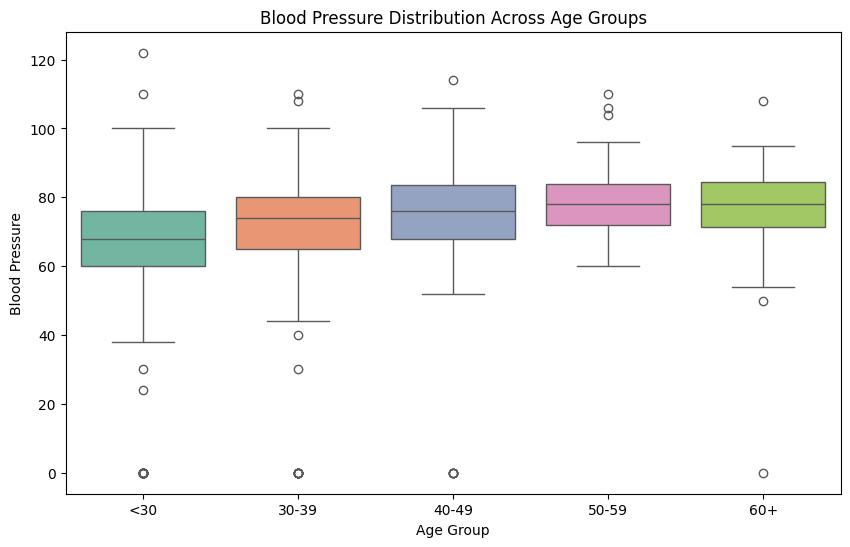

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('diabetes.csv')

# Define age groups
bins = [0, 29, 39, 49, 59, 100]
labels = ['<30', '30-39', '40-49', '50-59', '60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Box plot of blood pressure by age group
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='AgeGroup', y='BloodPressure', palette='Set2')
plt.title('Blood Pressure Distribution Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Blood Pressure')
plt.show()


**Young individuals (<30):**

Generally lower and tighter range of blood pressure.

Few outliers unless there are underlying health issues.

Middle-aged (30–49):

Gradual increase in median blood pressure.

Greater variation, possibly due to lifestyle factors or early onset hypertension.

Older adults (50–59 and 60+):

Tendency toward higher median and spread in blood pressure.

More outliers, indicating increased variability and possibly more hypertensive individuals.

8. Is there a correlation between BMI and Glucose levels?

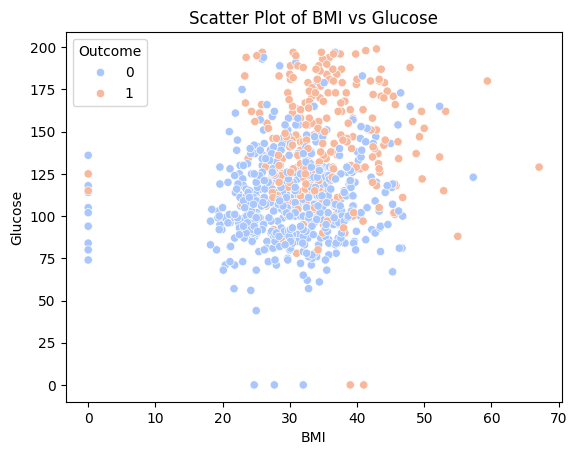

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='BMI', y='Glucose', hue='Outcome', palette='coolwarm')
plt.title('Scatter Plot of BMI vs Glucose')
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.show()


🔎 Expected Inference:
Positive trend: As BMI increases, glucose levels tend to rise — especially in diabetic patients (Outcome = 1).

A cluster of high BMI & high Glucose cases is often seen in the diabetic group.

In [5]:
correlation = df['BMI'].corr(df['Glucose'])
print(f"Pearson correlation between BMI and Glucose: {correlation:.2f}")


Pearson correlation between BMI and Glucose: 0.22


9. Are there any observable patterns in the relationship between diabetes progression
and patient age?

/tmp/ipython-input-6-876525898.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Outcome', y='Age', palette='Set2')


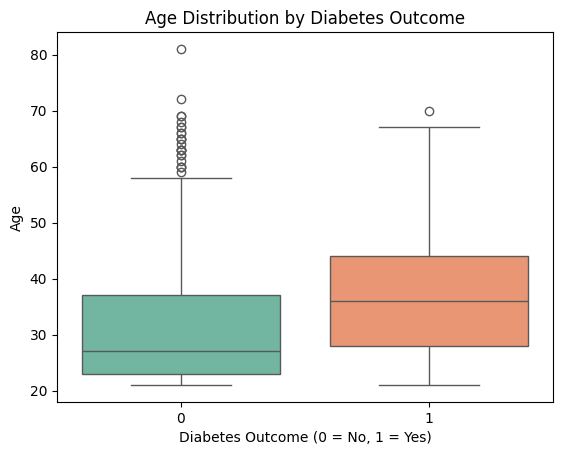

In [6]:
sns.boxplot(data=df, x='Outcome', y='Age', palette='Set2')
plt.title('Age Distribution by Diabetes Outcome')
plt.xlabel('Diabetes Outcome (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()


🔎 Expected Inference:
Diabetics (Outcome=1):

Median age is higher compared to non-diabetics.

Broader spread, with more older individuals affected.

Non-Diabetics (Outcome=0):

Tends to cluster around younger ages, with fewer outliers.

/tmp/ipython-input-7-3006406990.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prevalence = df.groupby('AgeGroup')['Outcome'].mean() * 100


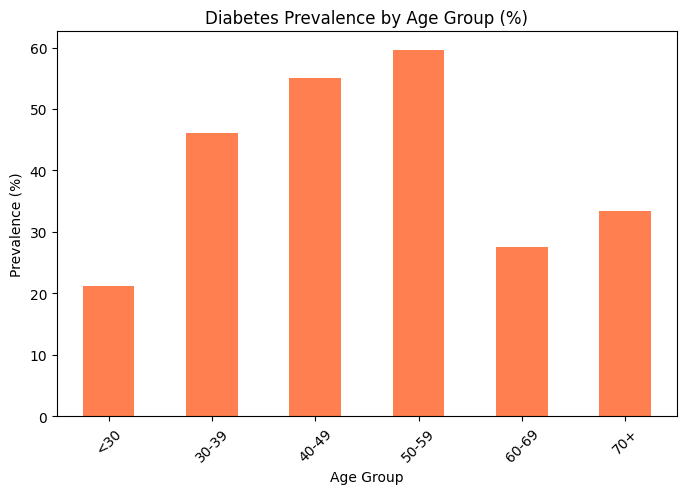

In [7]:
# Group data by age bins and calculate diabetes prevalence
bins = [0, 29, 39, 49, 59, 69, 100]
labels = ['<30', '30-39', '40-49', '50-59', '60-69', '70+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Calculate diabetes prevalence by age group
prevalence = df.groupby('AgeGroup')['Outcome'].mean() * 100

# Plot prevalence
prevalence.plot(kind='bar', color='coral', figsize=(8, 5))
plt.title('Diabetes Prevalence by Age Group (%)')
plt.ylabel('Prevalence (%)')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.show()


🔎 Expected Inference:
Prevalence increases with age, with a sharp rise after 40 years.

The highest rates are observed in individuals aged 50–69.

Indicates that age is a key factor in diabetes progression, likely due to lifestyle factors, metabolic changes, and cumulative health risks

In [8]:
correlation = df['Age'].corr(df['Outcome'])
print(f"Correlation between Age and Diabetes Outcome: {correlation:.2f}")


Correlation between Age and Diabetes Outcome: 0.24


🔎 Expected Result:
Moderate positive correlation (e.g., ~0.3–0.4), indicating older individuals are more likely to develop diabetes.

10. How do insulin levels vary across different age groups?

In [9]:
import pandas as pd

# Load your dataset if not loaded
df = pd.read_csv('diabetes.csv')

# Create age bins
bins = [0, 29, 39, 49, 59, 69, 100]
labels = ['<30', '30–39', '40–49', '50–59', '60–69', '70+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)


/tmp/ipython-input-10-3990727128.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='AgeGroup', y='Insulin', palette='Set3')


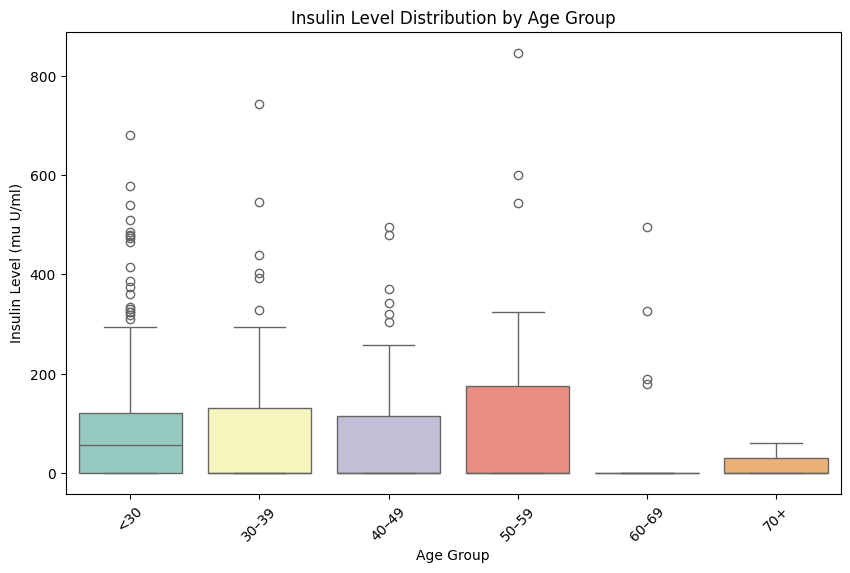

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='AgeGroup', y='Insulin', palette='Set3')
plt.title('Insulin Level Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Insulin Level (mu U/ml)')
plt.xticks(rotation=45)
plt.show()


✅ Observation:
Most age groups will show wide variation in insulin, with medians relatively low.

Some age groups (especially younger) may have a spike at 0 due to missing values (zeroes) in the dataset.

Older age groups may show higher median insulin or more outliers, reflecting impaired insulin response or treatment.

📈 Inference:
Variation, not trend, is likely more prominent — due to biological and lifestyle variability.

High variability in insulin levels within all age groups suggests:

Not all individuals in older age produce more insulin.

Some older individuals may have insulin resistance (producing more but less effective).

Data quality (many zeroes in Insulin) may limit reliability — consider imputing missing values before deeper analysis.